In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [100]:
se_st = pd.read_csv('data/Seasons_Stats.csv', index_col = 0)
se_st

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [93]:
se_st.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24691 entries, 0 to 24690
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    24624 non-null  float64
 1   Player  24624 non-null  object 
 2   Pos     24624 non-null  object 
 3   Age     24616 non-null  float64
 4   Tm      24624 non-null  object 
 5   G       24624 non-null  float64
 6   GS      18233 non-null  float64
 7   MP      24138 non-null  float64
 8   PER     24101 non-null  float64
 9   TS%     24538 non-null  float64
 10  3PAr    18839 non-null  float64
 11  FTr     24525 non-null  float64
 12  ORB%    20792 non-null  float64
 13  DRB%    20792 non-null  float64
 14  TRB%    21571 non-null  float64
 15  AST%    22555 non-null  float64
 16  STL%    20792 non-null  float64
 17  BLK%    20792 non-null  float64
 18  TOV%    19582 non-null  float64
 19  USG%    19640 non-null  float64
 20  blanl   0 non-null      float64
 21  OWS     24585 non-null  float64
 22

In [94]:
# видаляємо повністю пусті рядки, та стовбці із пропусками
se_st.dropna(axis=0, how='all', inplace=True)
se_st.dropna(axis=1, how='any', inplace=True)

# видаляємо стовбці у яких менше 24000 не пустих значень
#drop_columns = [a for a in se_st.columns if se_st[a].notnull().value_counts()[1] < 24624 ]
#se_st.drop(drop_columns, axis=1, inplace=True)

se_st

,Year,Player,Pos,Tm,G,FG,FGA,2P,2PA,FT,FTA,AST,PF,PTS
0,1950.0,Curly Armstrong,G-F,FTW,63.0,144.0,516.0,144.0,516.0,170.0,241.0,176.0,217.0,458.0
1,1950.0,Cliff Barker,SG,INO,49.0,102.0,274.0,102.0,274.0,75.0,106.0,109.0,99.0,279.0
2,1950.0,Leo Barnhorst,SF,CHS,67.0,174.0,499.0,174.0,499.0,90.0,129.0,140.0,192.0,438.0
3,1950.0,Ed Bartels,F,TOT,15.0,22.0,86.0,22.0,86.0,19.0,34.0,20.0,29.0,63.0
4,1950.0,Ed Bartels,F,DNN,13.0,21.0,82.0,21.0,82.0,17.0,31.0,20.0,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,CHO,62.0,253.0,443.0,253.0,442.0,133.0,196.0,99.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,BOS,51.0,78.0,158.0,78.0,157.0,22.0,39.0,42.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,ORL,19.0,10.0,31.0,10.0,31.0,3.0,5.0,4.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,CHI,44.0,88.0,221.0,55.0,122.0,31.0,40.0,36.0,78.0,240.0


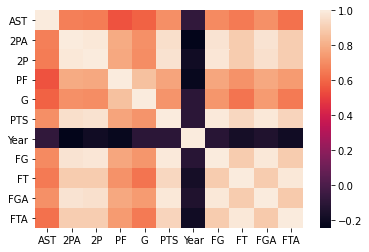

In [95]:
# обчислимо матрицю кореляції

features = list(set(se_st.columns) - set(['Player', 'Pos', 'Tm']))

sns.heatmap(se_st[features].corr())

Ми можемо бачити, що такі показники як "2PA" та "2P"; "PTS" та "FGA"; "FT" та "FTA" мають повну взаємозалежність, тому ми можемо позбутися однієї фічі у кожній парі
Також, цікаво помітити, що відсутня кореляція любих фіч із роком народження

In [96]:
se_st.drop(['2PA', 'PTS', 'FTA'], axis=1, inplace=True)
se_st

,Year,Player,Pos,Tm,G,FG,FGA,2P,FT,AST,PF
0,1950.0,Curly Armstrong,G-F,FTW,63.0,144.0,516.0,144.0,170.0,176.0,217.0
1,1950.0,Cliff Barker,SG,INO,49.0,102.0,274.0,102.0,75.0,109.0,99.0
2,1950.0,Leo Barnhorst,SF,CHS,67.0,174.0,499.0,174.0,90.0,140.0,192.0
3,1950.0,Ed Bartels,F,TOT,15.0,22.0,86.0,22.0,19.0,20.0,29.0
4,1950.0,Ed Bartels,F,DNN,13.0,21.0,82.0,21.0,17.0,20.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,CHO,62.0,253.0,443.0,253.0,133.0,99.0,189.0
24687,2017.0,Tyler Zeller,C,BOS,51.0,78.0,158.0,78.0,22.0,42.0,61.0
24688,2017.0,Stephen Zimmerman,C,ORL,19.0,10.0,31.0,10.0,3.0,4.0,17.0
24689,2017.0,Paul Zipser,SF,CHI,44.0,88.0,221.0,55.0,31.0,36.0,78.0


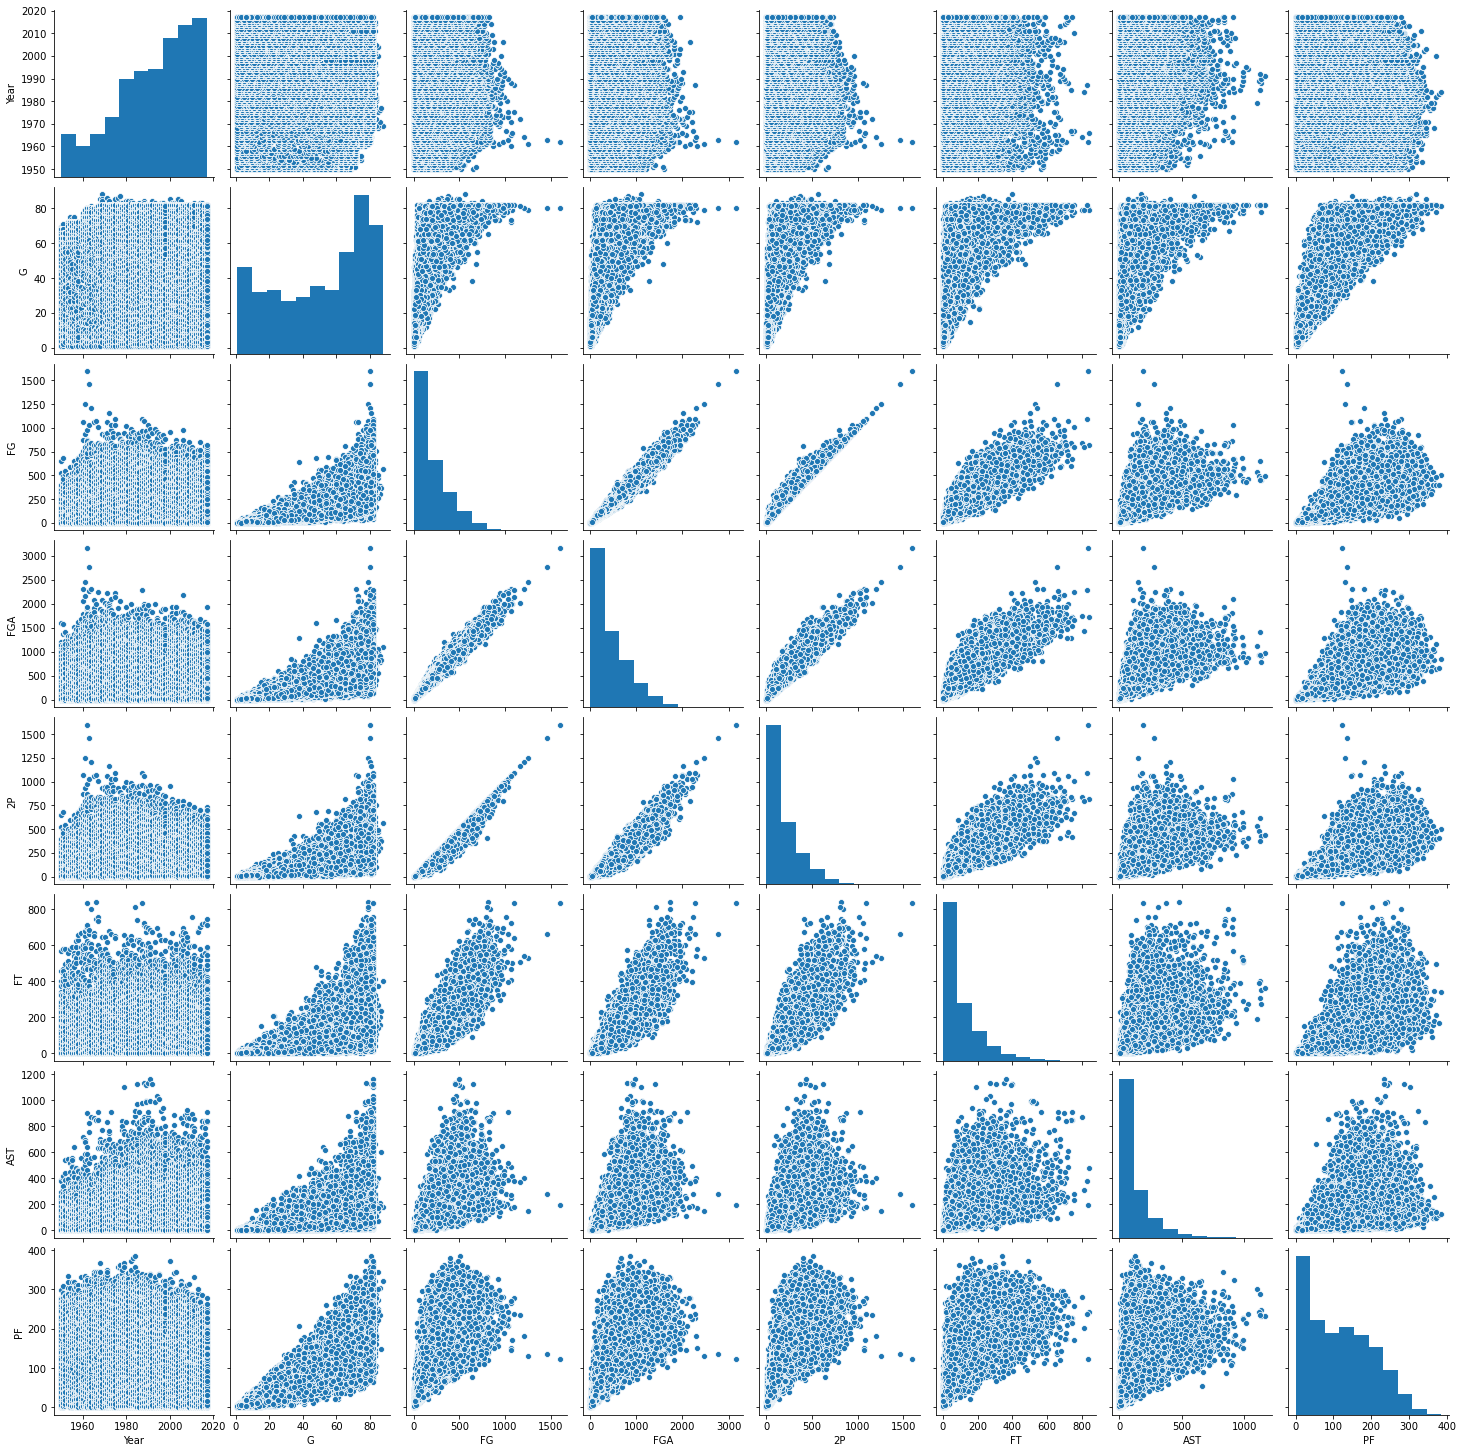

In [98]:
sns.pairplot(se_st)

Можна побачити, що є досить виявлений зв'язок між наступними показниками:
G - всі крім років; 
FG - FT, 2P, FGA; 
FGA - FT, 2P; 
2P - FT.

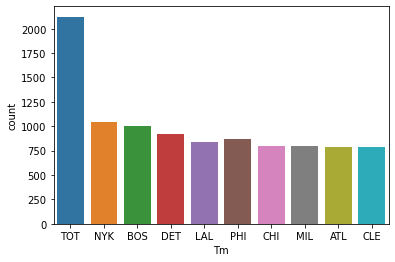

In [148]:
# відобразимо 10 команд, що найбільше зустрічаються у датасеті

teams = se_st['Tm'].value_counts().head(10).index

sns.countplot(x='Tm', data=se_st[se_st['Tm'].isin(teams)])

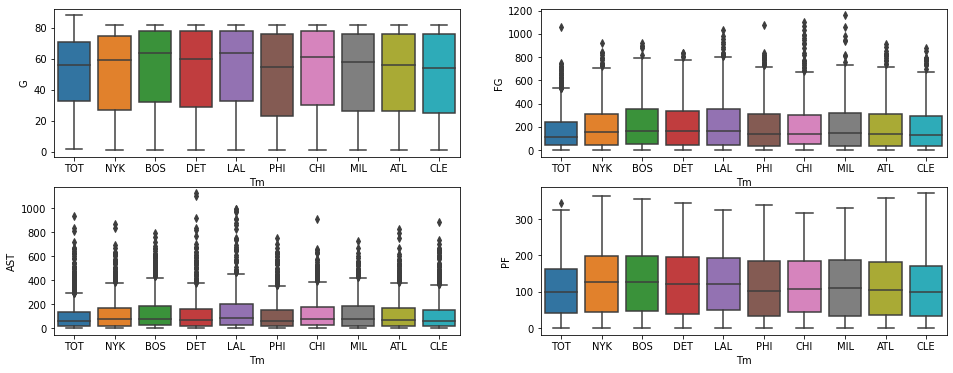

In [149]:
# побудуємо статистичний розподіл для цих 10 команд

_, axes = plt.subplots(2, 2, figsize=(16,6))
sns.boxplot(x=se_st[se_st['Tm'].isin(teams)]['Tm'], y='G', data=se_st, ax=axes[0,0])
sns.boxplot(x=se_st[se_st['Tm'].isin(teams)]['Tm'], y='FG', data=se_st, ax=axes[0,1])
sns.boxplot(x=se_st[se_st['Tm'].isin(teams)]['Tm'], y='AST', data=se_st, ax=axes[1,0])
sns.boxplot(x=se_st[se_st['Tm'].isin(teams)]['Tm'], y='PF', data=se_st, ax=axes[1,1])

бачимо, що для гравців команди "TOT" по всім показникам є найменший статистичний розподіл